In [1]:
import numpy as np
from q_lab_toolbox.unitary_circuits import _HEA_fac, TriangularLayout
from q_lab_toolbox.physics_defns.target_systems import DecaySystem
from q_lab_toolbox.optimizer import optimize
from q_lab_toolbox.observables import all_observables
from q_lab_toolbox.training_data import random_rho0s, solve_lindblad_rho0s, mk_training_data, solve_lindblad_rho0

In [2]:
qubits = TriangularLayout(m=2, cutoff=1, distance=0.9)
circuit = _HEA_fac(qubits, depth=1, repeats=1)

<Axes: title={'center': 'Qubit layout'}>

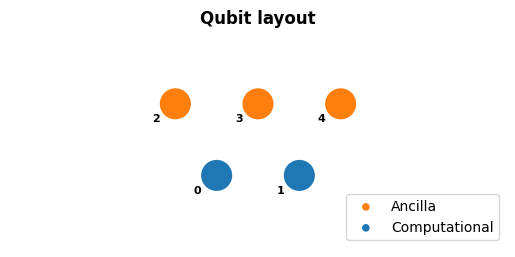

In [3]:
qubits.show_layout()

In [4]:
system = DecaySystem(ryd_interaction=0.2, omegas=(0.5,), m=1, gammas=(0.5,))

rho0s = random_rho0s(m=1, L=100, seed=1)
rhoss, ts = solve_lindblad_rho0s(rho0s=rho0s, delta_t=0.5, N=3, s=system)
Os = all_observables(m=1)
training_data = mk_training_data(rhoss, Os)

In [5]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100, n_grad=10)

random_rho0s: setting seed=57954


ValueError: could not broadcast input array from shape (2,2) into shape (4,4)

In [ ]:
import matplotlib.pyplot as plt
from q_lab_toolbox.optimizer import channel_fac
from q_lab_toolbox.initial_states import rho_rand_haar
from q_lab_toolbox.visualize import plot_ess, compare_ess
from q_lab_toolbox.training_data import measure_rhos

In [ ]:
rho0 = rho_rand_haar(1, 4)

In [ ]:
def evolve_n_times(n: int, rho):
    rho_acc = rho
    rhos = [rho_acc]
    phi = channel_fac(circuit)(theta=theta_opt)
    for i in range(n):
        rho_acc = phi(rho_acc)
        rhos.append(rho_acc)

    return np.array(rhos)

In [ ]:
from q_lab_toolbox.observables import create_readout_computational_basis

In [ ]:
rhos = evolve_n_times(20, rho0)
Os = create_readout_computational_basis(1)
ess = measure_rhos(rhos, Os)

In [ ]:
theta_opt

array([1.42702269, 1.5       , 1.5       , 0.27531339, 2.78360463,
       2.33881488, 0.59768275, 1.5       , 1.5       , 0.80612808])

In [ ]:
from q_lab_toolbox.training_data import solve_lindblad_rho0s
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=20, s=system)
e_ref_ss = measure_rhos(rho_ref_s, Os)

c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

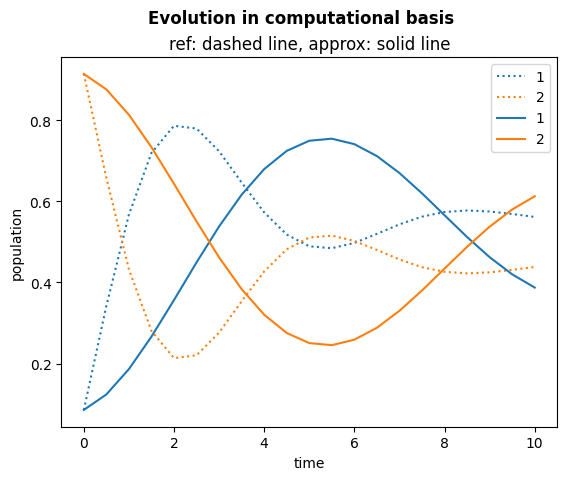

In [ ]:

compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=["1", "2", "3", "4"])

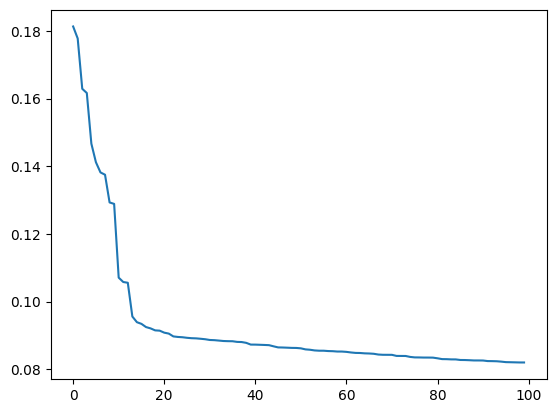

In [ ]:
plt.plot(errors)